# Big Data (UBA) -  2024

## Trabajo Práctico 2

### Fecha de entrega:
<font color='red'> Viernes 8 de Noviembre a las 13:00 hs </font>

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada **TP2**. Este Jupyter Notebook y el correspondiente al **TP2** deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [4]:
# Importo pandas y creo un data_frame "airbandb_df" con el que iniciare las tareas
import pandas as pd
airbandb_df = pd.read_csv("Base Airbnb NY.csv")
airbandb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [5]:
#Encontrar Duplicados (busque en pandas que argumento se usa)
airbandb_df.duplicated() # Boolean Method es decir retonna falso (false) o verdadero (true)

,0
0,False
1,False
2,False
3,False
4,False
...,...
48900,True
48901,True
48902,True
48903,True


In [6]:
# Tengan en cuenta si hay valores duplicados y eliminénlos.
# Busco si hay duplicados - Creo un Boolean Mask y le digo a pandas que busque las filas duplicados y las elimine, dejando las restantes (no duplicadas)
duplicated_rows = airbandb_df[airbandb_df.duplicated()]
duplicated_rows.to_excel("table1.xlsx")

In [7]:
# Creo una nueva variable llamada "airbandb_dropped" que seria el nuevo data frame sin los duplicados
airbandb_dropped = airbandb_df.drop_duplicates()
airbandb_dropped.to_excel("table2.xlsx")
airbandb_dropped

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,NaN,6,2


In [8]:
#•	Eliminen las columnas que no tienen información de interés.
# Enumero las columnsas que quiero mantener, con base a lo que solicita el Ejercicio 2 -
columns_to_keep = ['neighbourhood_group',
                   'latitude',
                   'longitude',
                   'room_type',
                   'price',
                   'minimum_nights',
                   'number_of_reviews',
                   'reviews_per_month',
                   'calculated_host_listings_count',
                   'availability_365']
airbandb_2 = airbandb_dropped[columns_to_keep]
airbandb_2.to_excel("table3.xlsx")
airbandb_2.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0


In [9]:
#•	(Opcional) Luego de leer el artículo Missing-data imputation (Missing-data imputation articulo alternativo), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
# Identifico donde estan los missing values ((@google get rows with nan pandas)) ==> resulta en 10,064 filas y las que no tienen dato son las review_per_month
airbandb_imputation = airbandb_2.loc[airbandb_2.isna().any(axis=1)]
airbandb_imputation.to_excel("table4.xlsx")
airbandb_imputation

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
19,Manhattan,40.79685,-73.94872,Entire home/apt,190.0,7,0,NaN,2,249
26,Manhattan,40.86754,-73.92639,Private room,80.0,4,0,NaN,1,0
36,Brooklyn,40.68876,-73.94312,Private room,35.0,60,0,NaN,1,365
38,Brooklyn,40.63702,-73.96327,Private room,150.0,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70.0,2,0,NaN,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40.0,4,0,NaN,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55.0,1,0,NaN,6,2


In [10]:
#count nan in column pandas - Counting NaN values in all columns -Resultado: comuna de reviews per month es la que mas tiene missing data (10,052) y prices (15)
airbandb_nan_count=airbandb_2.isna().sum()
airbandb_nan_count.to_excel("table5.xlsx")
print(airbandb_nan_count)

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [11]:
# step 1 - only 15 rows are missing prices - delete them.  It just doesn't matter. ((https://www.statology.org/pandas-dropna-specific-column/)) y
#queda de resultado 48,880 filas.
airbandb_2_price_dropped = airbandb_2.dropna(subset=['price'])
len(airbandb_2_price_dropped)
airbandb_2_price_dropped.to_excel("table6.xlsx")
airbandb_2_price_dropped

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70.0,2,0,NaN,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40.0,4,0,NaN,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55.0,1,0,NaN,6,2


In [12]:
# step 2 - examination of the data shows that NaN in reviews per month exist ONLY where the number of reviews is 0 - so replace all Nans with 0 y si sale el error es solo un warming
airbandb_2_price_dropped["reviews_per_month"]=airbandb_2_price_dropped["reviews_per_month"].fillna(0)

<ipython-input-12-5119f192d052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbandb_2_price_dropped["reviews_per_month"]=airbandb_2_price_dropped["reviews_per_month"].fillna(0)


In [13]:
# Cuento cuantos nan quedron
airbnb_2_reviews_imputed_count = airbandb_2_price_dropped.isna().sum()
airbnb_2_reviews_imputed_count.to_excel("table7.xlsx")
print(airbnb_2_reviews_imputed_count)

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [14]:
#Si hay observaciones con outliers o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
# Para cada columna busco min, max, media, mediana, y desvio estandar
airbandb_2_described = airbandb_2_price_dropped.describe()
airbandb_2_described.to_excel("table8.xlsx")
airbandb_2_described

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000,48880.000000
mean,40.728950,-73.952170,152.732140,7.030360,23.277046,1.090943,7.138523,112.426268
std,0.054527,0.046156,240.187672,20.513052,44.556207,1.597452,32.925607,133.042011
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,-999.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763120,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
# In order to work with outliers, I need panda and numpy. Define an ourliers in this case, is numerical values above or below 3 standar deviations.
# The outliers values can be in one or more columns (or vaiables), so we define an outliers to be dropped out when a row contains more than 3 variables
#with outliers value.
# this is the argument we follows:
# Step 1: Import numpy for numerical and logical operations.
import numpy as np
# Step 2: Get the list of numeric columns from the DataFrame.
columns_list = airbandb_2_price_dropped.select_dtypes(include=['number']).columns.to_list()
print(columns_list)  # Display the columns being processed.
# step 3: define the outliers in rows that contains more than 3 variables with outliers
def filter_outliers_for_multiple_columns(df, columns, threshold=3):
    """ Identifies and returns rows in a DataFrame where values in at least a specified number of columns (threshold) are 3 or more standard deviations
    away from the column mean.
    Parameters:
    - df (pandas.DataFrame): The input DataFrame to filter.
    - columns (list): A list of numeric columns to check for outliers.
    - threshold (int): The minimum number of columns with outliers required to retain a row. Default is 3.
    Returns:
    - pandas.DataFrame: A filtered DataFrame containing only rows with outliers in at least 'threshold' number of columns.
    """
    # List to store boolean masks identifying outliers for each column.
    outlier_masks = []
# Step 4: Loop through the specified columns to compute outliers.
    for column in columns:
        mean = df[column].mean()  # Compute the mean of the column.
        std_dev = df[column].std()  # Compute the standard deviation of the column.
        # Create a boolean mask for outliers: True where the value is more than 3 standard deviations away from the mean.
        column_mask = np.logical_or(
            df[column] < mean - 3 * std_dev,  # Outlier: Value much smaller than the mean.
            df[column] > mean + 3 * std_dev   # Outlier: Value much larger than the mean.
        )
# Step 5: Store the boolean mask for the current column.
        outlier_masks.append(column_mask)
# Step 6: Stack the masks along columns to create a 2D boolean array. Each row corresponds to a row in the DataFrame; each column is a column mask.
    stacked_masks = np.stack(outlier_masks, axis=1)
# Step 7: Sum along the row axis (axis=1) to count how many columns have outliers in each row.
    # Create a final mask that is True if at least 'threshold' columns are outliers.
    combined_mask = np.sum(stacked_masks, axis=1) >= threshold
    # Use the final mask to filter the DataFrame and return the matching rows.
    return df[combined_mask]
# Step 8: Call the function on the DataFrame using the list of numeric columns.
outlier_rows = filter_outliers_for_multiple_columns(airbandb_2_price_dropped, columns_list)
outlier_rows.to_excel("table9.xlsx")
outlier_rows


['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5816,Queens,40.68520,-73.79620,Entire home/apt,89.0,1,352,6.10,1,359
11339,Manhattan,40.74867,-73.96734,Entire home/apt,1170.0,80,0,0.00,121,365
11759,Queens,40.66730,-73.76831,Private room,47.0,1,629,14.58,2,333
13495,Queens,40.66939,-73.76975,Private room,47.0,1,576,13.40,2,173
14194,Queens,40.70684,-73.74627,Entire home/apt,97.0,2,252,6.08,1,290
14378,Queens,40.66275,-73.76391,Private room,40.0,2,375,9.26,3,336
14639,Queens,40.67560,-73.78244,Entire home/apt,150.0,1,257,7.38,4,80
15618,Queens,40.72635,-73.80237,Entire home/apt,99.0,1,229,5.97,1,7
16247,Queens,40.67321,-73.79247,Entire home/apt,195.0,1,239,6.31,4,256
16875,Manhattan,40.75143,-73.96973,Entire home/apt,1100.0,120,0,0.00,121,184


In [16]:
# I list the index numbers for the outliers rows
outlier_rows.index

Index([ 5816, 11339, 11759, 13495, 14194, 14378, 14639, 15618, 16247, 16875,
       18068, 19186, 20315, 20988, 21187, 21559, 21879, 21902, 22011, 22100,
       22104, 22107, 25249, 26977, 27287, 27847, 28651, 29628, 45572],
      dtype='int64')

In [17]:
# I drop the index numbers with outliers from the data_frame "airbandb_2_price_dropped" and create a new df "airbandb_3".
airbandb_3 = airbandb_2_price_dropped.drop(outlier_rows.index)
airbandb_3.to_excel("table10.xlsx")
airbandb_3

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2


In [23]:
# Transformen las variables ‘neighbourhood_group’ y ‘room_type’ a variables numericas. False = 0, True=1
airbandb_ohe = pd.get_dummies(airbandb_3, columns=['neighbourhood_group', 'room_type'])
airbandb_ohe.to_excel("table11.xlsx")
airbandb_ohe

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149.0,1,9,0.21,6,365,False,True,False,False,False,False,True,False
1,40.75362,-73.98377,225.0,1,45,0.38,2,355,False,False,True,False,False,True,False,False
2,40.80902,-73.94190,150.0,3,0,0.00,1,365,False,False,True,False,False,False,True,False
3,40.68514,-73.95976,89.0,1,270,4.64,1,194,False,True,False,False,False,True,False,False
4,40.79851,-73.94399,80.0,10,9,0.10,1,0,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2,0,0.00,2,9,False,True,False,False,False,False,True,False
48891,40.70184,-73.93317,40.0,4,0,0.00,2,36,False,True,False,False,False,False,True,False
48892,40.81475,-73.94867,115.0,10,0,0.00,1,27,False,False,True,False,False,True,False,False
48893,40.75751,-73.99112,55.0,1,0,0.00,6,2,False,False,True,False,False,False,False,True


In [24]:
# Con la ayuda de los comandos groupby y join o merge, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna offer group ((Group by the column Neighbourhood group to calculate the number of offers. Create a new column called offer_group that contains this count. Join or merge the result back into the original DataFrame.)

offer_counts = airbandb_3.groupby('neighbourhood_group').size()
offer_counts_df = pd.DataFrame(offer_counts, columns = ['offer_counts'])
offer_counts_df.to_excel("table12.xlsx")
offer_counts_df


,offer_counts
neighbourhood_group,
Bronx,1089
Brooklyn,20097
Manhattan,21655
Queens,5638
Staten Island,372


Here, we have done the Part I of homework.

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación. También , tenga encuenta

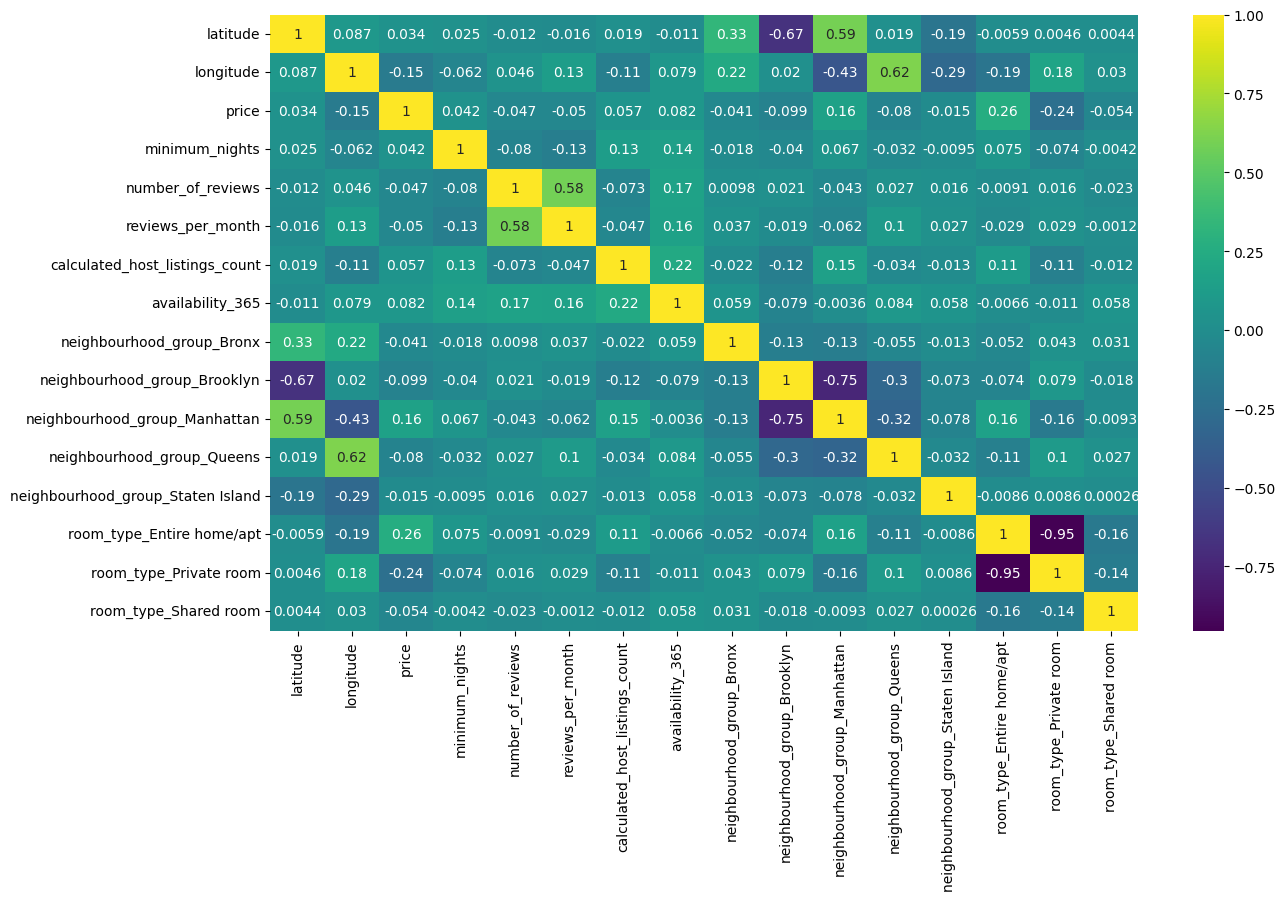

In [25]:
# Matriz de Correlacion
import seaborn as sns
from matplotlib import pyplot as plt#Seaborn is a Python data visualization library based on matplotlib
correlation_m = airbandb_ohe.corr(method="pearson") #I created a new variable to plug it in seaborn
correlation_m.to_excel("table13.xlsx")
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_m, annot=True, cmap = "viridis")
plt.savefig("correlation.png", dpi=300, bbox_inches="tight")#took this from google
plt.show()


# Comments: High positive correlation is seen on dark green and high negative correlation in pink. Latitude and longitud high correlations are related to
#neighbourhood, and #or reviews with reviws per month.

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [26]:
#traigo la tabla de antes
offer_counts_df
offer_counts_df.to_excel("table14.xlsx")
offer_counts_df

,offer_counts
neighbourhood_group,
Bronx,1089
Brooklyn,20097
Manhattan,21655
Queens,5638
Staten Island,372


In [27]:
total = offer_counts_df["offer_counts"].sum()
offer_counts_df["proportion"] = (offer_counts_df["offer_counts"]/total) *100
offer_counts_df.to_excel("table15.xlsx")
offer_counts_df

,offer_counts,proportion
neighbourhood_group,,
Bronx,1089,2.229228
Brooklyn,20097,41.139383
Manhattan,21655,44.328673
Queens,5638,11.541217
Staten Island,372,0.761499


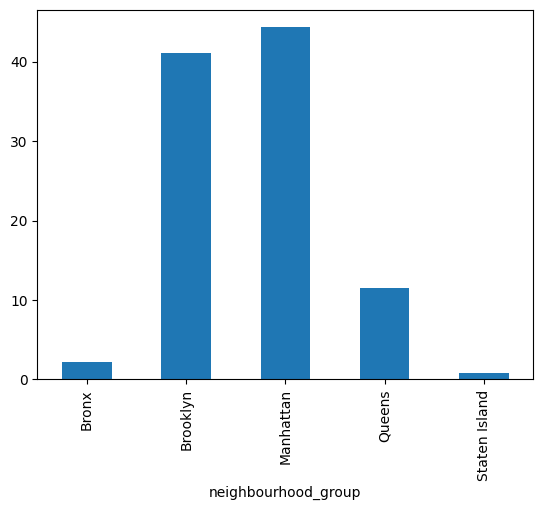

In [28]:
offer_counts_df["proportion"].plot.bar()
plt.savefig("offer_counts_bar_plot.png", dpi=300, bbox_inches="tight")  # Adjust dpi as needed

# Show the plot (optional)
plt.show()

In [29]:
room_type = airbandb_3.groupby('room_type').size()
room_type_df = pd.DataFrame(room_type, columns = ['room_type_counts'])
room_type_df.to_excel("table16.xlsx")
room_type_df

,room_type_counts
room_type,
Entire home/apt,25390
Private room,22301
Shared room,1160


,room_type_counts,proportion
room_type,,
Entire home/apt,25390,51.974371
Private room,22301,45.651061
Shared room,1160,2.374568


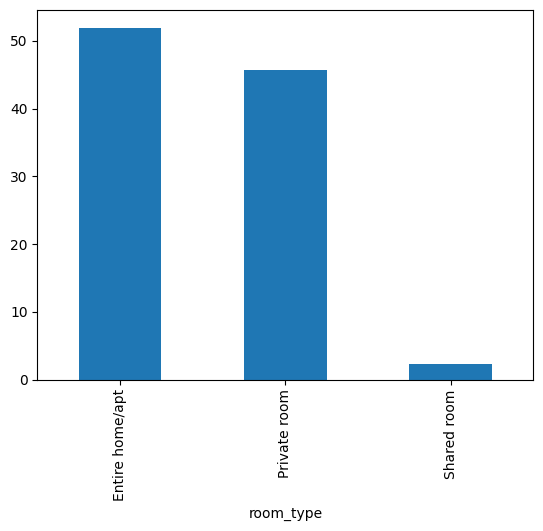

In [30]:
total = room_type_df["room_type_counts"].sum()
room_type_df["proportion"] = (room_type_df["room_type_counts"] / total) * 100
room_type_df["proportion"].plot.bar()
plt.savefig("room_type_proportions_bar_plot.png", dpi=300, bbox_inches="tight")
room_type_df.to_excel("table17.xlsx")
room_type_df

#### Ejercicio 4
Realicen un histograma y función de kernel de los precios de los alojamientos. Comenten el gráfico obtenido, las decisiones de ancho de banda y función de kernel seleccionada. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?

,price
count,48851.000000
mean,152.710671
std,240.117378
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


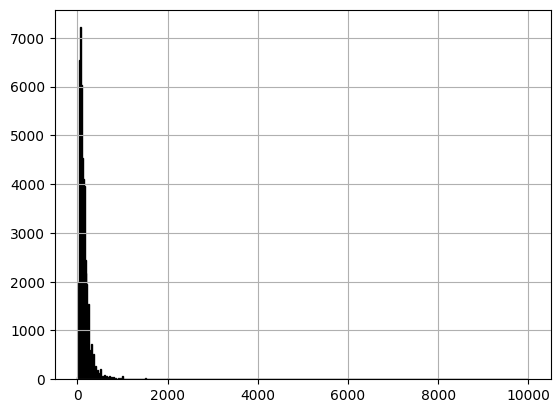

In [31]:
# look at pandas about histograms and kernel functions
airbandb_3['price'].hist(bins=500, color="skyblue", edgecolor="black")
plt.savefig("airbandb_hist.png", dpi=300, bbox_inches="tight")
airbandb_3['price'].describe().to_excel("table18.xlsx")
airbandb_3['price'].describe()


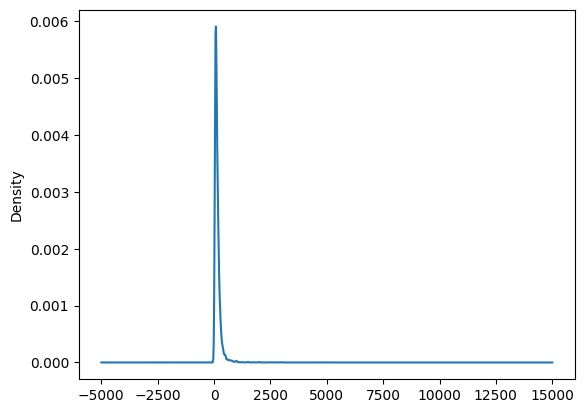

In [32]:
airbandb_3['price'].plot.kde() #basid model
plt.savefig("airbandb_kde.png", dpi=300, bbox_inches="tight")

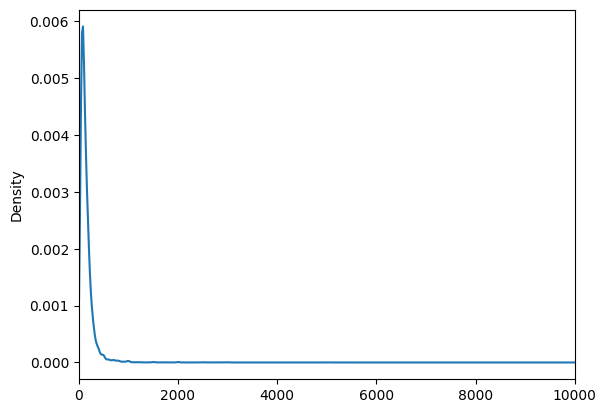

In [33]:
ax = airbandb_3['price'].plot.kde() #kernel function by default "gaussian with scott's rule bandwidth"
ax.set_xlim(0, 10000) # change in the scale of the graph, starting in 0 up to 10,000.
plt.savefig("airbandb_kde2.png", dpi=300, bbox_inches="tight")
plt.show()

In [34]:
#¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?
airbandb_3.groupby(['neighbourhood_group']).mean(["price"]).to_excel("table19.xlsx")
airbandb_3.groupby(['neighbourhood_group']).mean(["price"])


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,
Bronx,40.848290,-73.884522,87.464646,4.564738,25.983471,1.474949,2.235078,164.403122
Brooklyn,40.685038,-73.951184,124.391451,6.057869,24.207543,1.049920,2.284421,99.801413
Manhattan,40.765069,-73.974606,196.792011,8.570723,20.988917,0.976855,12.768460,111.848026
Queens,40.731776,-73.873221,99.648634,5.196701,26.360411,1.524150,4.066336,143.445725
Staten Island,40.610438,-74.105544,111.760753,4.806452,31.024194,1.580618,2.322581,200.153226


In [35]:
airbandb_3.groupby(['room_type']).mean(["price"]).to_excel("table20.xlsx")
airbandb_3.groupby(['room_type']).mean(["price"])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,
Entire home/apt,40.728670,-73.960762,211.735605,8.502875,22.735368,1.042154,10.682828,111.538716
Private room,40.729253,-73.943039,89.805569,5.381059,23.898659,1.136094,3.228062,110.763105
Shared room,40.730514,-73.943343,70.127586,6.475000,16.600000,1.073345,4.662931,162.000862


In [36]:
# Calculamos la media del precio para vencindario y tipo de habitacion

#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

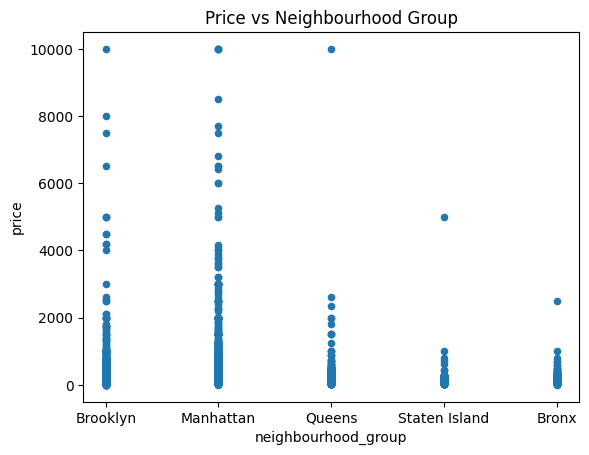

In [37]:
airbandb_3.plot.scatter(y="price", x="neighbourhood_group", title="Price vs Neighbourhood Group")
plt.savefig("airbandb_scatter.png", dpi=300, bbox_inches="tight")
plt.show()
# Comment: the variable is categoric, abd thence this is the scatter shape graph

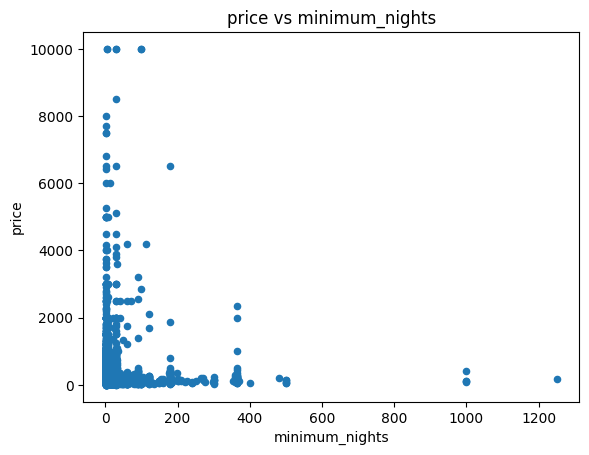

In [38]:
airbandb_3.plot.scatter(y="price", x="minimum_nights", title="price vs minimum_nights")
plt.savefig("airbandb_scatter2.png", dpi=300, bbox_inches="tight")
plt.show()
#Comment: using a continues variable, the scatter has this shape

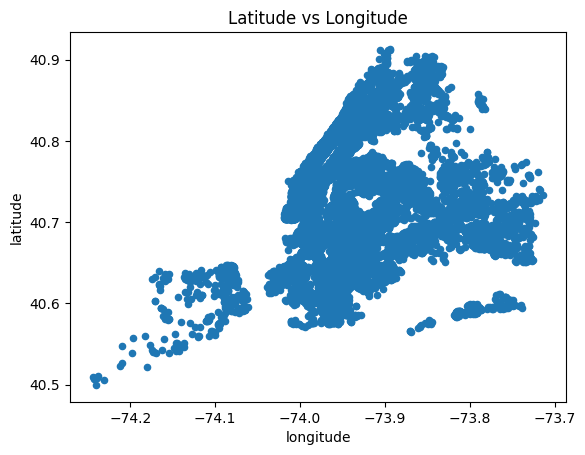

In [39]:
airbandb_3.plot.scatter(y="latitude", x="longitude", title="Latitude vs Longitude")
plt.savefig("airbandb_scatter3.png", dpi=300, bbox_inches="tight")
plt.show()
#Comment: comparing locations, it shows a map of NYC

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las *ponderaciones* (o *loadings*) de las variables en dos dimensiones (biplot con flechas). Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [40]:
#import PCA from sklearn
from sklearn.decomposition import PCA #Import PCA
pca = PCA() #Create a variable that is an instance of this class PCA
pca.fit(airbandb_ohe) #fit the df on the PCA or runs the PCA in the data frame
explained_variance_ratio = pca.explained_variance_ratio_ #we want to know the explained variance to plot it

In [41]:
explained_variance_ratio #this array is the coef of the PCA and the first 2 explais 95% of teh variance of the data

array([7.33986307e-01, 2.24085655e-01, 2.41313474e-02, 1.26744674e-02,
       5.08786738e-03, 2.05853239e-05, 5.96956206e-06, 4.95615242e-06,
       1.88656026e-06, 4.37995619e-07, 3.72573545e-07, 1.22775484e-07,
       1.51428797e-08, 9.08619616e-09, 1.60646366e-22, 0.00000000e+00])

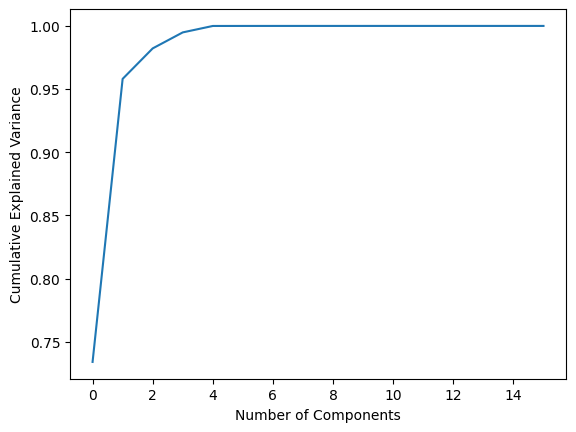

In [42]:
plt.plot(np.cumsum(explained_variance_ratio)) #cumsum es acumm sum in the plot shows the above mentioned (Scree plot)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig("scree_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [43]:
optimized_pca = PCA(n_components=2) #Calling just with 2 PCA

In [44]:
pca_vectors = pca.components_

In [45]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Prepare data
X = airbandb_ohe  # Ensure this is your one-hot encoded DataFrame
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)
features = X.columns

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_X_df)

Loadings Matrix:
                                        PC1       PC2
latitude                           0.486460  0.736209
longitude                         -0.533313  0.462348
price                              0.385231 -0.154726
minimum_nights                     0.184238 -0.054091
number_of_reviews                 -0.153808  0.128296
reviews_per_month                 -0.191372  0.192561
calculated_host_listings_count     0.282151 -0.014442
availability_365                   0.017303  0.136665
neighbourhood_group_Bronx         -0.038620  0.365291
neighbourhood_group_Brooklyn      -0.590161 -0.703593
neighbourhood_group_Manhattan      0.818844  0.338082
neighbourhood_group_Queens        -0.350439  0.445051
neighbourhood_group_Staten Island  0.014996 -0.205370
room_type_Entire home/apt          0.607029 -0.423885
room_type_Private room            -0.599120  0.406126
room_type_Shared room             -0.031874  0.062286


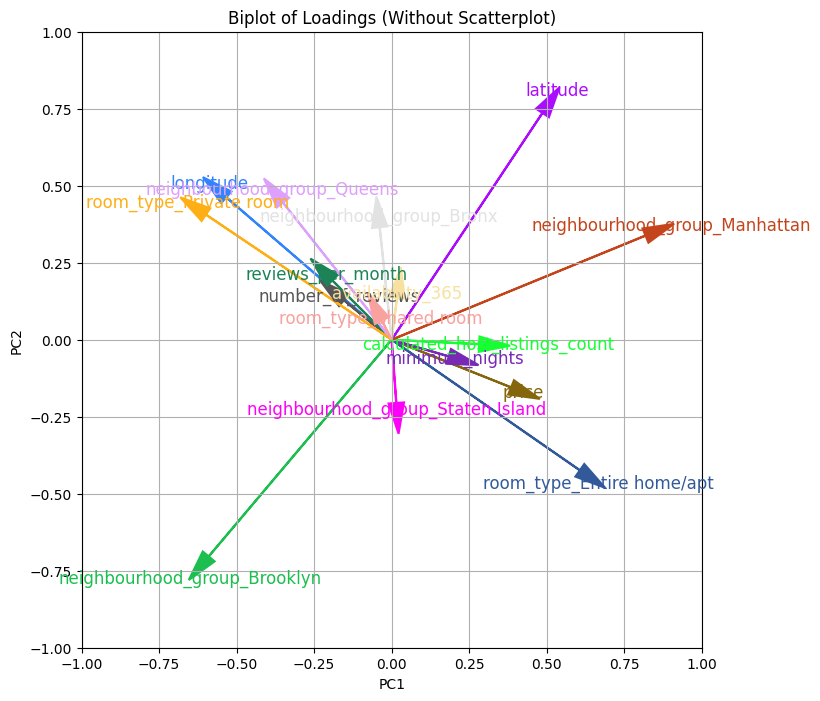

In [46]:
# Calculate the Loadings Matrix
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=features, columns=['PC1', 'PC2'])

# Display Loadings Matrix as a DataFrame
print("Loadings Matrix:")
print(loadings_df)

# Generate a larger color palette to avoid repetition
unique_colors = px.colors.qualitative.Alphabet + px.colors.qualitative.Bold

if len(features) > len(unique_colors):
    raise ValueError("Not enough unique colors for all features. Add more palettes if needed!")

# Create Biplot of the Loadings without the Scatterplot
fig, ax = plt.subplots(figsize=(8, 8))

for i, feature in enumerate(features):
    color = unique_colors[i]  # Assign a unique color to each feature

    # Add arrow representing the feature
    ax.arrow(
        0, 0, loadings[i, 0], loadings[i, 1],
        head_width=0.05, head_length=0.1, fc=color, ec=color, linewidth=1.5
    )

    # Add the feature name, matching the arrow color
    ax.text(
        loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature,
        fontsize=12, ha='center', va='center', color=color
    )

# Set axis limits and labels
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot of Loadings (Without Scatterplot)')

# Add grid for better visualization
plt.grid(True)

plt.savefig("biplot.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

In [47]:

# Calculate loadings
#loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Generate a larger color palette to avoid repetition
unique_colors = px.colors.qualitative.D3 + px.colors.qualitative.Plotly + px.colors.qualitative.Set3

if len(features) > len(unique_colors):
    raise ValueError("Not enough unique colors to represent all features. Add more color sets!")

# Calculate mean of 'minimum_nights' for color centering
color_column = "price"
color_mean = scaled_X_df[color_column].mean()

# Initialize the plot with centered colors on the mean
fig = px.scatter(
    components,
    x=0, y=1,
    color=scaled_X_df[color_column],
    color_continuous_scale=px.colors.sequential.Cividis,  # Use Viridis for smoother color mapping
    range_color=[color_mean - 3, color_mean + 3],  # Center around the mean
    title=f"PCA Biplot Colored by {color_column}",  # Add the feature name to the title
    labels={'0': 'PC1', '1': 'PC2'}
)

# Add arrows and labels with matching colors
for i, feature in enumerate(features):
    color = unique_colors[i]  # Select a unique color for each feature

    # Add arrow for the feature
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        arrowcolor=color,  # Arrow color
        xanchor="right",
        yanchor="top"
    )

    # Add label for the feature with matching color
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        font=dict(
            color=color,
            size=12,
            family="Arial Black"
        ),
        yshift=5,
    )

# Adjust layout
fig.update_layout(height=1000, width=1000)
plt.savefig("biplot_scatter.png", dpi=300, bbox_inches="tight")
fig.show()


<Figure size 640x480 with 0 Axes>

En el biplot de un Análisis de Componentes Principales (ACP), la longitud de la flecha (o vector) para cada característica indica cuánto contribuye esa característica a la variabilidad en la dirección de los componentes principales.

Cuando una flecha es más larga, significa que la característica correspondiente tiene una mayor contribución a la variabilidad en ese componente principal. Por ejemplo, si una flecha es más larga en la dirección del primer componente principal (CP1), esa característica está explicando más varianza en esa dirección, como es el caso de neighbourhood_group_brooklyn.

Además, la dirección en la que apuntan las flechas también es relevante. Si dos flechas apuntan en una dirección similar, eso indica que las características representadas están correlacionadas positivamente. En cambio, si las flechas apuntan en direcciones opuestas, sugiere que hay una correlación negativa entre esas características.

Otro aspecto importante es la proyección de los puntos en relación con los vectores. El ángulo entre dos flechas nos da pistas sobre la correlación entre las características: un ángulo pequeño (o flechas que apuntan en la misma dirección) indica una correlación positiva, mientras que un ángulo grande (cerca de 180°) sugiere una correlación negativa.

Finalmente, si un punto de datos se proyecta cerca del vector de una característica en particular, eso significa que esa observación tiene un valor alto para esa característica. En resumen, la longitud y orientación de las flechas en el biplot revelan qué características contribuyen más a la variabilidad de los datos, lo que convierte al ACP en una herramienta clave para la reducción de dimensiones y la interpretación de características.

### Parte III: Predicción y Validación

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [48]:
# I drop only two variables that seems to be more correlated with price (neighbourhood_group_Manhattan and room_type_Entire home/apt)
#Created a new df #4 without the two variables
airbandb_4 = airbandb_ohe.drop(columns=['neighbourhood_group_Manhattan', 'room_type_Entire home/apt'])
airbandb_4.to_excel("table21.xlsx")
airbandb_4

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149.0,1,9,0.21,6,365,False,True,False,False,True,False
1,40.75362,-73.98377,225.0,1,45,0.38,2,355,False,False,False,False,False,False
2,40.80902,-73.94190,150.0,3,0,0.00,1,365,False,False,False,False,True,False
3,40.68514,-73.95976,89.0,1,270,4.64,1,194,False,True,False,False,False,False
4,40.79851,-73.94399,80.0,10,9,0.10,1,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2,0,0.00,2,9,False,True,False,False,True,False
48891,40.70184,-73.93317,40.0,4,0,0.00,2,36,False,True,False,False,True,False
48892,40.81475,-73.94867,115.0,10,0,0.00,1,27,False,False,False,False,False,False
48893,40.75751,-73.99112,55.0,1,0,0.00,6,2,False,False,False,False,False,True


In [49]:
airbandb_4.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [50]:
# Use train & test from sklearn
from sklearn.model_selection import train_test_split #import

X = airbandb_4.drop(columns=['price'])
Y = airbandb_4['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=201)

In [51]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((34195, 13), (14656, 13), (34195,), (14656,))

#### Ejercicio 9
Implementen una regresión lineal, generen un una tabla para presentar las estimaciones de los coeficientes y comenten los resultados obtenidos.

In [52]:
from sklearn.linear_model import LinearRegression # import the linear regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
# Get the coefficients and intercept
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
# The prediction is:
y_pred = lr.predict(X_test)

Coefficients: [-1.87421117e+02 -5.06858903e+02 -2.55984484e-02 -2.44548879e-01
 -3.95695733e+00 -1.75184527e-01  1.95067199e-01 -2.94950814e+01
 -6.21581033e+01 -3.16110492e+01 -1.94498378e+02 -1.06380944e+02
 -1.45482931e+02]
Intercept: -29623.823530995425


In [53]:
# Show Predicted prices
y_pred

array([264.32201464, 308.13982299, 229.2441027 , ..., 146.46006419,
       230.24654526, 224.23891957])

In [54]:
# tabla de coeficientes
table_dict = {"X_variable": X_test.columns, "coefficients": lr.coef_} #Cree un diccionario
table_coef_df = pd.DataFrame(table_dict)
table_coef_df.to_excel("table22.xlsx", index=False)
table_coef_df

,X_variable,coefficients
0,latitude,-187.421117
1,longitude,-506.858903
2,minimum_nights,-0.025598
3,number_of_reviews,-0.244549
4,reviews_per_month,-3.956957
5,calculated_host_listings_count,-0.175185
6,availability_365,0.195067
7,neighbourhood_group_Bronx,-29.495081
8,neighbourhood_group_Brooklyn,-62.158103
9,neighbourhood_group_Queens,-31.611049


Los resultados de la regresión nos ofrecen una visión interesante sobre los factores que influyen en el precio de los alojamientos en Airbnb. Por un lado, observamos que la ubicación geográfica juega un papel fundamental. Los alojamientos situados en zonas con mayores valores de latitud y longitud tienden a ser más económicos. Asimismo, los vecindarios más populares, como Manhattan, suelen tener precios más elevados en comparación con otros. Por otro lado, características como el tipo de habitación también impactan significativamente en el precio. Los alojamientos privados y compartidos son generalmente más baratos que los apartamentos completos. Es interesante notar que a medida que aumenta el número de reseñas positivas y la frecuencia con la que se reciben, el precio tiende a disminuir, lo que sugiere que los huéspedes valoran la reputación de los anfitriones. Además, una mayor disponibilidad a lo largo del año se asocia con precios más altos, posiblemente debido a una mayor demanda en esos casos.

En resumen, este modelo de regresión nos permite identificar una serie de factores clave que influyen en la determinación del precio de los alojamientos en Airbnb. La ubicación geográfica, el tipo de habitación, el número de reseñas y la disponibilidad son solo algunos de los elementos que parecen jugar un papel importante. Sin embargo, es fundamental recordar que estos resultados se basan en el conjunto de datos específico utilizado en el análisis y pueden variar al considerar otros factores o diferentes mercados.

#### Ejercicio 10: Predicción afuera de la muestra
Calcule el Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE), y el Error Absoluto Medio (MAE) en la base de entrenamiento y testeo (usando coeficientes estimados con la base de entrenamiento). Presente los resultados en una tabla y comente las diferencias de calcular estas medidas de bondad de ajuste adentro y afuera de la muestra

In [55]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, y_pred)
rmse = root_mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

error_list = ['mse', 'rmse', 'mae']
error_vals = [mse, rmse, mae]

error_df = pd.DataFrame({"error":error_list, 'error_vals':error_vals})

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

error_df.to_excel("table23.xlsx", index=False)

MSE: 49418.41703772609
RMSE: 222.30253493319884
MAE: 73.44133229946273


In [56]:
# Crear el DataFrame
results_df = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'MAE'],
    'Valor': [mse, rmse, mae]
})

# Mostrar la tabla
print(results_df)

  Métrica         Valor
0     MSE  49418.417038
1    RMSE    222.302535
2     MAE     73.441332


Cuando calculamos estas medidas dentro de la muestra (in-sample), estamos evaluando el desempeño del modelo en los datos que se usaron para entrenarlo. En este caso, es común que los valores de MSE, RMSE y MAE sean bajos, ya que el modelo está ajustado específicamente a estos datos y, en consecuencia, puede captar las relaciones presentes en ellos con precisión. Sin embargo, un buen ajuste dentro de la muestra no siempre indica que el modelo generalizará bien en datos nuevos. Un modelo que tiene un ajuste perfecto dentro de la muestra podría estar sobreajustado (overfitting), capturando ruido específico de los datos de entrenamiento en lugar de patrones generales.

Por otro lado, cuando calculamos estas medidas fuera de la muestra (out-of-sample) – es decir, en datos que el modelo no ha visto antes – evaluamos la capacidad del modelo para generalizar a datos nuevos. En esta situación, los valores de MSE, RMSE y MAE tienden a ser más altos que los obtenidos dentro de la muestra, ya que el modelo no está "entrenado" específicamente en estos datos y se enfrentará a un escenario donde debe aplicar los patrones aprendidos de manera general. Si los valores de error fuera de la muestra son significativamente más altos que los errores dentro de la muestra, podría indicar que el modelo no generaliza bien y está sobreajustado.

En conclusión, comparar las medidas de bondad de ajuste dentro y fuera de la muestra es fundamental para evaluar el rendimiento real del modelo. Un modelo que mantiene errores bajos en ambas muestras sugiere una buena capacidad de generalización, mientras que un modelo que presenta grandes diferencias podría estar sobreajustado y requerir ajustes para mejorar su capacidad predictiva en datos no vistos.